### 3. Consumo mensual de gasolina

#### - Gasolina super
#### - Gasolina regular
#### - Gasolina diésel
#### - Gasolina licuado

#### a. Especifique inicio, fin y frecuencia

#### b. Haga un gráfico de la serie y explique qué información puede obtener a primera vista.

#### c. Desconmponga la serie. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionariedad en media y en varianza.

#### d. Determine si es necesario transformar la serie

#### e. Explique si no es estacionaria en media.

Implementación del a hasta el e

In [2]:
# Importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_consumption = pd.read_csv('data/Consumption.csv')
df_consumption['Fecha'] = pd.to_datetime(df_consumption['Fecha'])
df_consumption['Anio'] = df_consumption['Fecha'].dt.year
df_import = pd.read_csv('data/Import.csv')
df_import['Fecha'] = pd.to_datetime(df_import['Fecha'])
df_import['Anio'] = df_import['Fecha'].dt.year

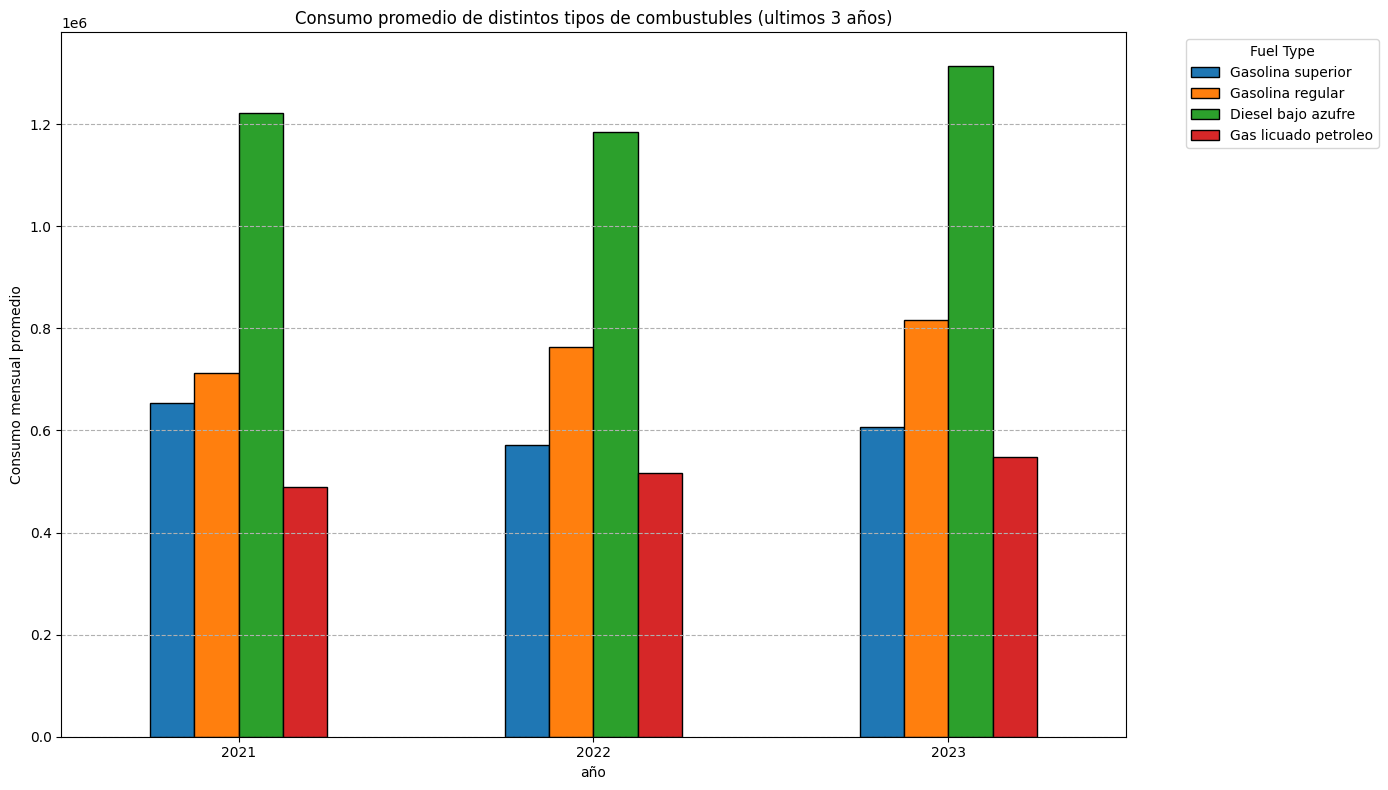

In [3]:
#consumo medio de gasolina al mes
import matplotlib.pyplot as plt

fuel_types_to_calculate = [
    "Gasolina superior",
    "Gasolina regular",
    "Diesel bajo azufre",
    "Gas licuado petroleo",
]
latest_year = df_consumption['Anio'].max()


last_three_years_data = df_consumption[df_consumption['Anio'].isin([latest_year - 2, latest_year - 1, latest_year])]

average_monthly_consumption_last_three_years = last_three_years_data.groupby('Anio')[fuel_types_to_calculate].mean()

average_monthly_consumption_last_three_years.plot(kind='bar', figsize=(14, 8), edgecolor='black')

plt.title('Consumo promedio de distintos tipos de combustubles (ultimos 3 años)')
plt.xlabel('año')
plt.ylabel('Consumo mensual promedio')
plt.xticks(rotation=0)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()



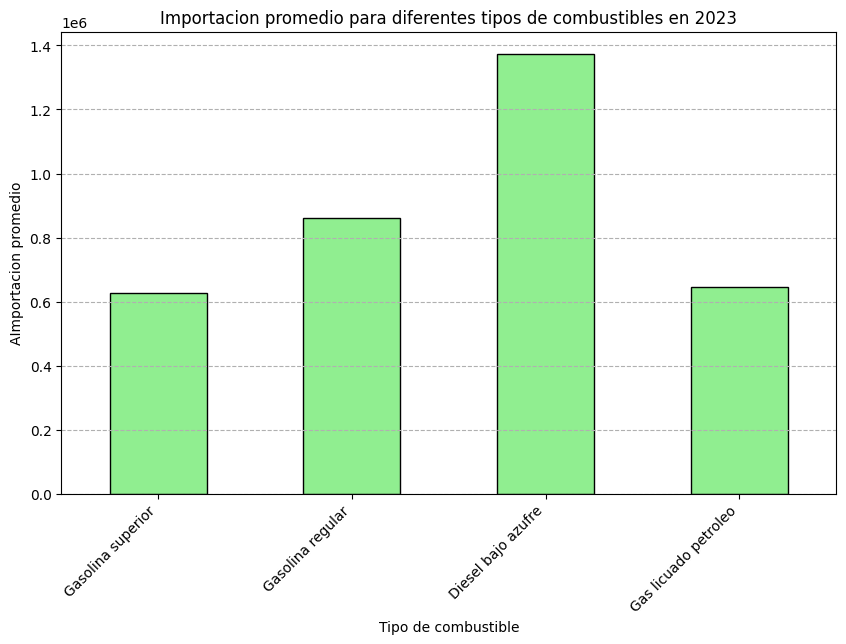

In [4]:
#Importacion promedio de combustibles
year_2023_import_data = df_import[df_import['Anio'] == 2023]

average_monthly_importation_2023 = year_2023_import_data[fuel_types_to_calculate].mean()

average_monthly_importation_2023.plot(kind='bar', figsize=(10, 6), color='lightgreen', edgecolor='black')

plt.title('Importacion promedio para diferentes tipos de combustibles en 2023')
plt.xlabel('Tipo de combustible')
plt.ylabel('AImportacion promedio')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()


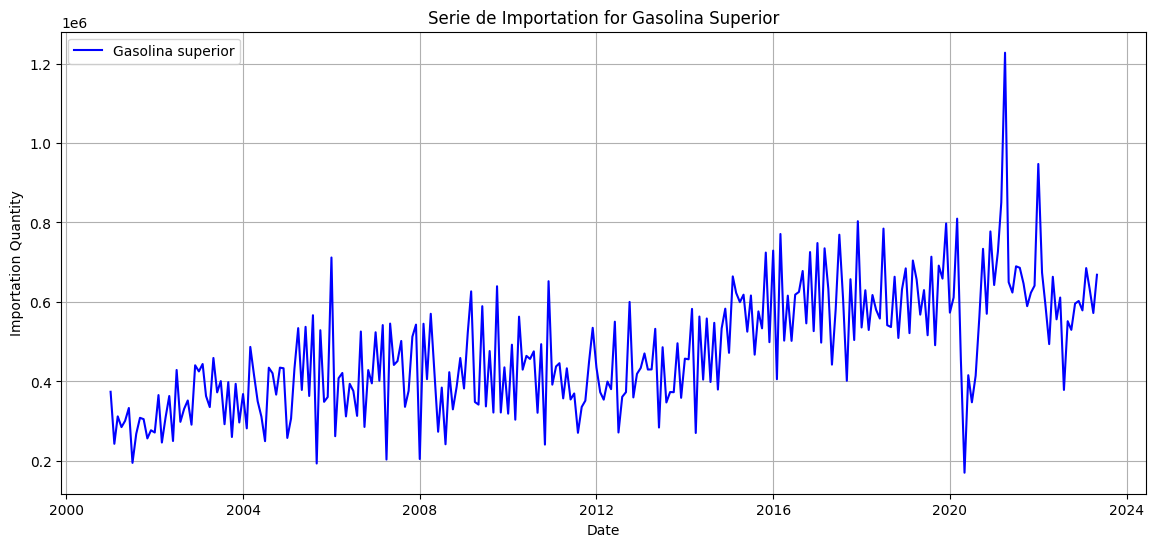

In [10]:
# inicio, fin y frequencia de la importación mensual de gasolina super, regular, diesel bajo en azufre y gas licuado de petróleo

import matplotlib.pyplot as plt
start_date_import = df_import['Fecha'].min()
end_date_import = df_import['Fecha'].max()
frequency_import = "Monthly" 

start_date_import, end_date_import, frequency_import

plt.figure(figsize=(14, 6))
plt.plot(df_import['Fecha'], df_import['Gasolina superior'], label='Gasolina superior', color='blue')
plt.title('Serie de Importation for Gasolina Superior')
plt.xlabel('Date')
plt.ylabel('Importation Quantity')
plt.grid(True)
plt.legend()
plt.show()



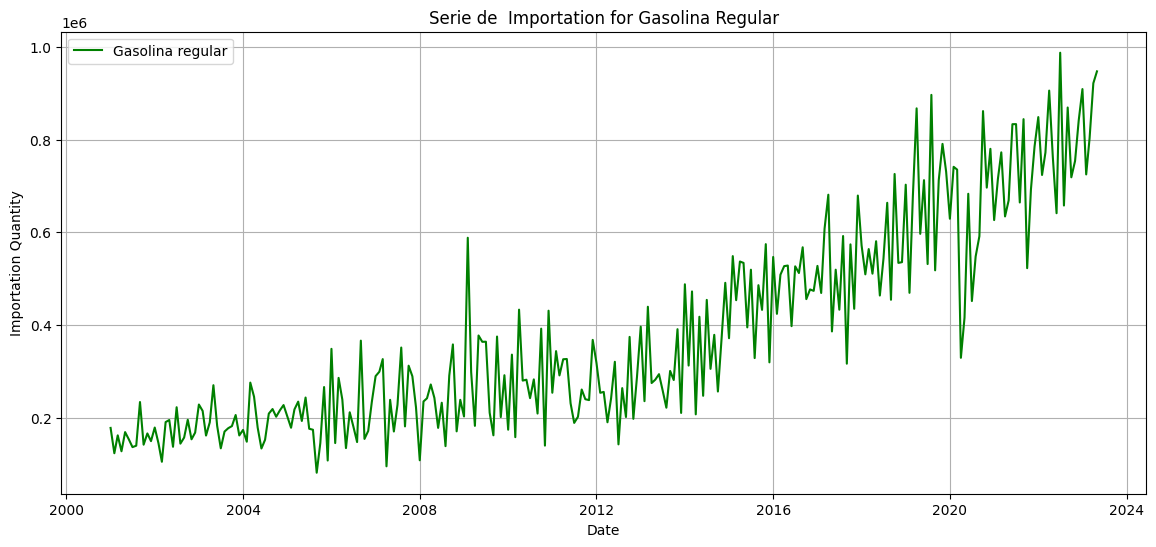

In [6]:

plt.figure(figsize=(14, 6))
plt.plot(df_import['Fecha'], df_import['Gasolina regular'], label='Gasolina regular', color='green')
plt.title('Serie de  Importation for Gasolina Regular')
plt.xlabel('Date')
plt.ylabel('Importation Quantity')
plt.grid(True)
plt.legend()
plt.show()


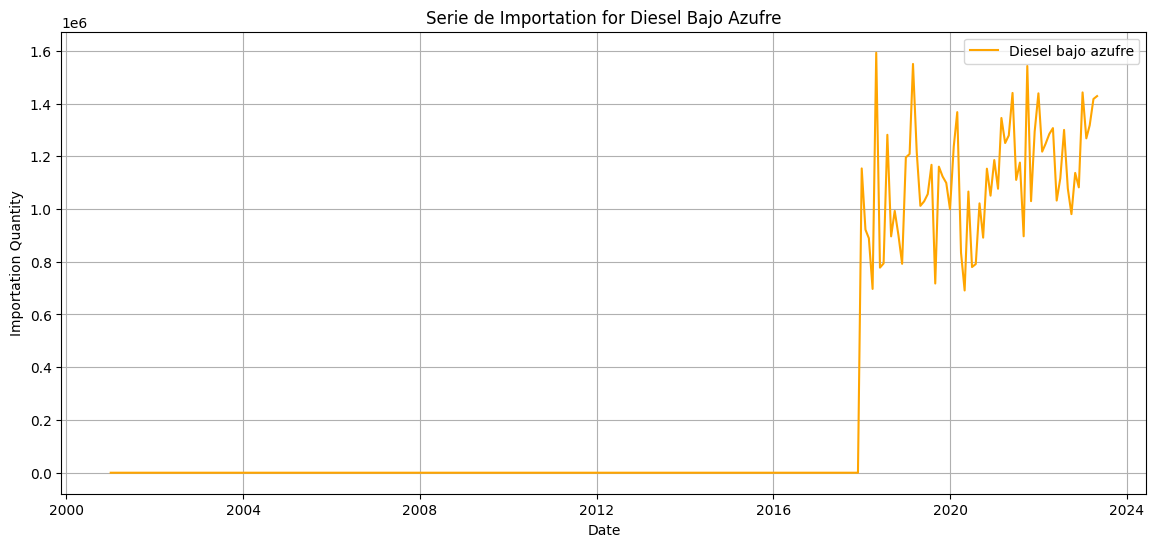

In [7]:

plt.figure(figsize=(14, 6))
plt.plot(df_import['Fecha'], df_import['Diesel bajo azufre'], label='Diesel bajo azufre', color='orange')
plt.title('Serie de Importation for Diesel Bajo Azufre')
plt.xlabel('Date')
plt.ylabel('Importation Quantity')
plt.grid(True)
plt.legend()
plt.show()


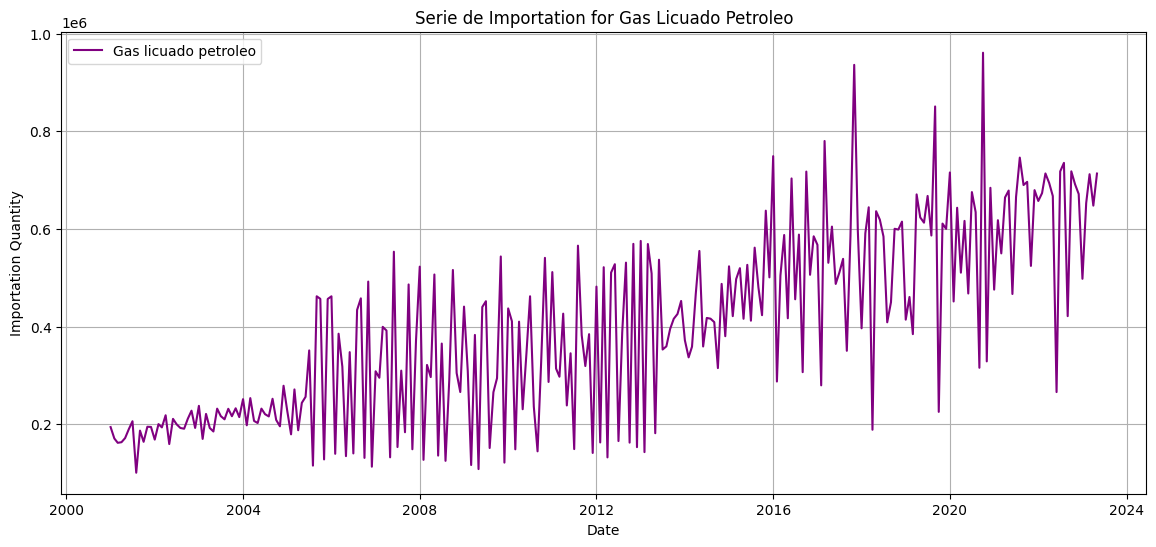

In [9]:

plt.figure(figsize=(14, 6))
plt.plot(df_import['Fecha'], df_import['Gas licuado petroleo'], label='Gas licuado petroleo', color='purple')
plt.title('Serie de Importation for Gas Licuado Petroleo')
plt.xlabel('Date')
plt.ylabel('Importation Quantity')
plt.grid(True)
plt.legend()
plt.show()


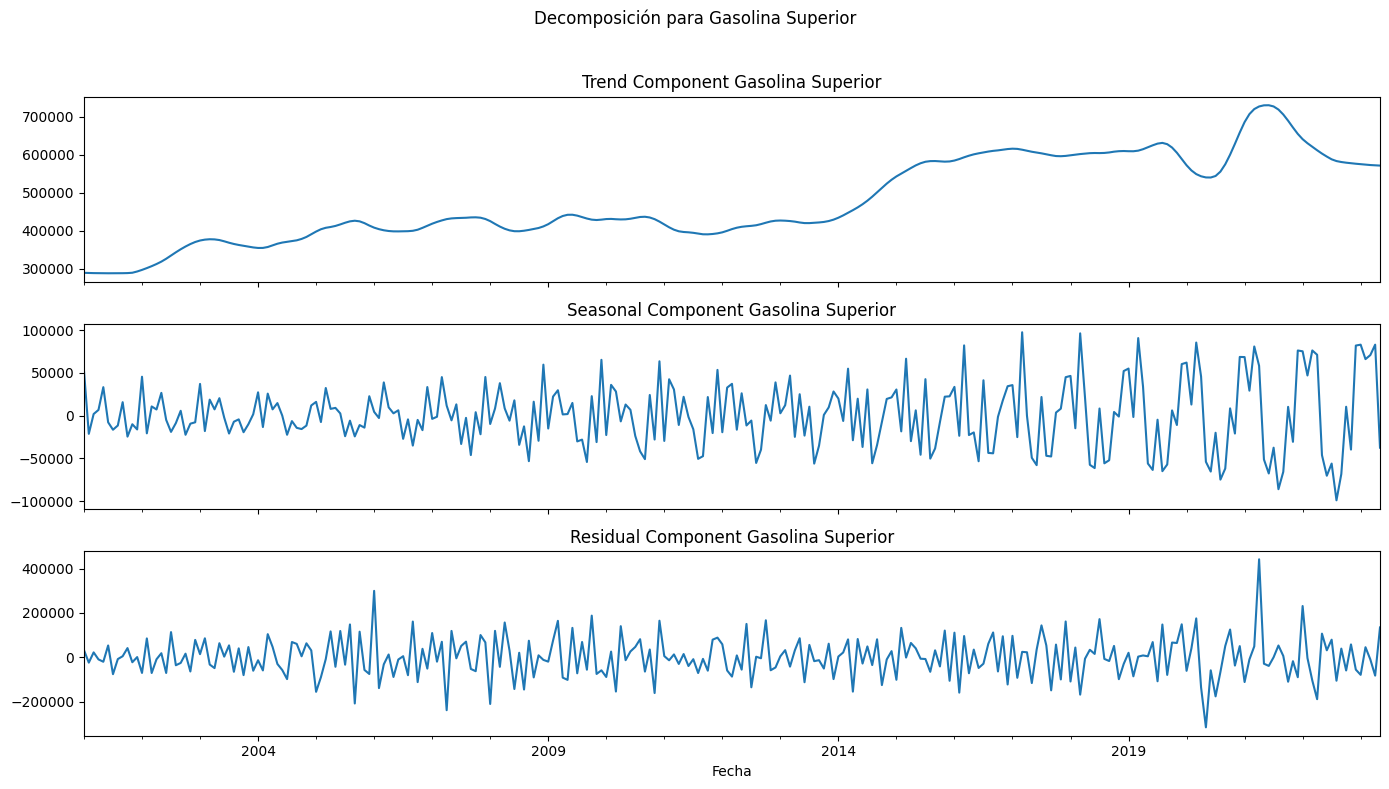

In [11]:
#descomposicion de las series

from statsmodels.tsa.seasonal import STL
gasolina_superior_series = df_import.set_index('Fecha')['Gasolina superior']

stl_gasolina_superior = STL(gasolina_superior_series, seasonal=13) 
result_gasolina_superior = stl_gasolina_superior.fit()
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(14, 8), sharex=True)
result_gasolina_superior.trend.plot(ax=ax1, title='Trend Component Gasolina Superior')
result_gasolina_superior.seasonal.plot(ax=ax2, title='Seasonal Component Gasolina Superior')
result_gasolina_superior.resid.plot(ax=ax3, title='Residual Component Gasolina Superior')
plt.suptitle('Decomposición para Gasolina Superior')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


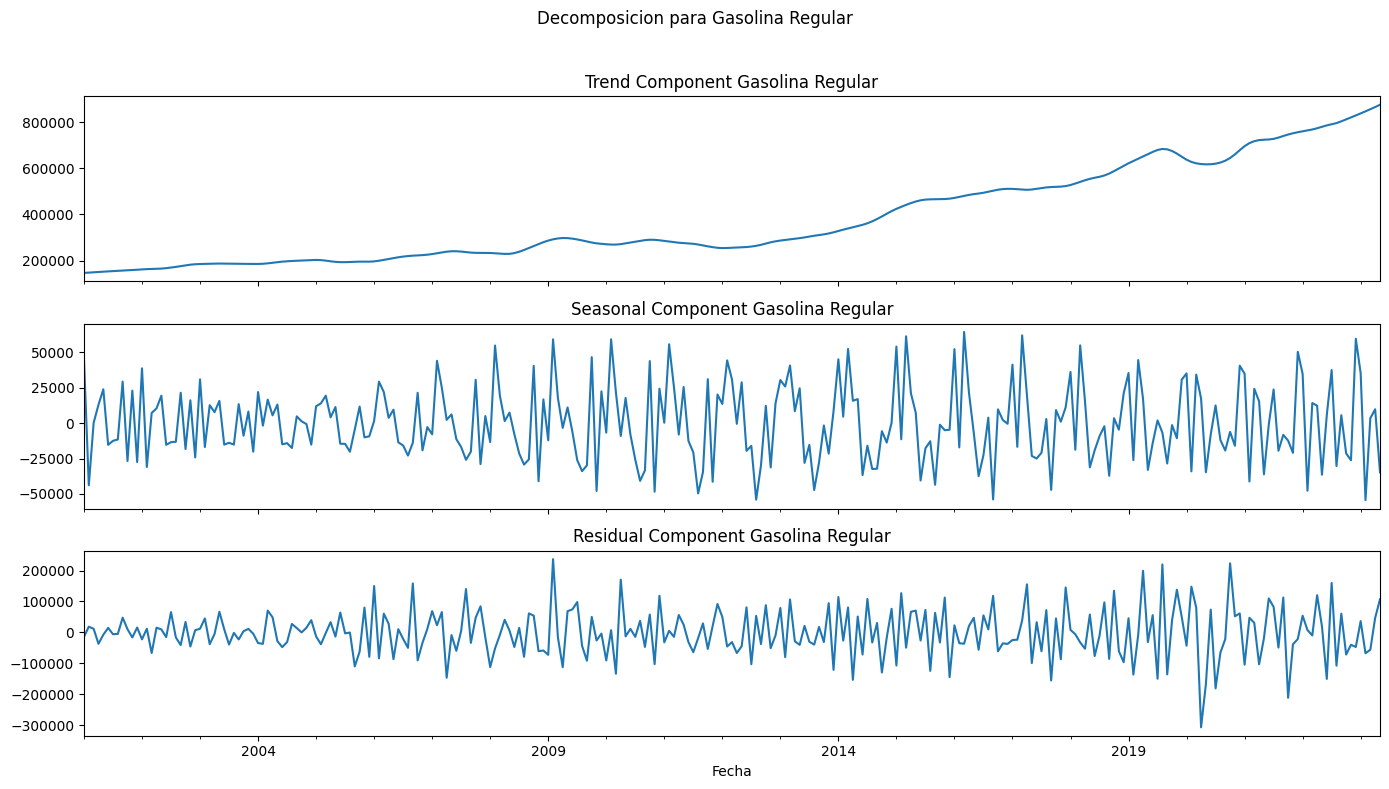

In [12]:
#Gasolina regular
gasolina_regular_series = df_import.set_index('Fecha')['Gasolina regular']

stl_gasolina_regular = STL(gasolina_regular_series, seasonal=13)
result_gasolina_regular = stl_gasolina_regular.fit()

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(14, 8), sharex=True)
result_gasolina_regular.trend.plot(ax=ax1, title='Trend Component Gasolina Regular')
result_gasolina_regular.seasonal.plot(ax=ax2, title='Seasonal Component Gasolina Regular')
result_gasolina_regular.resid.plot(ax=ax3, title='Residual Component Gasolina Regular')
plt.suptitle('Decomposicion para Gasolina Regular')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


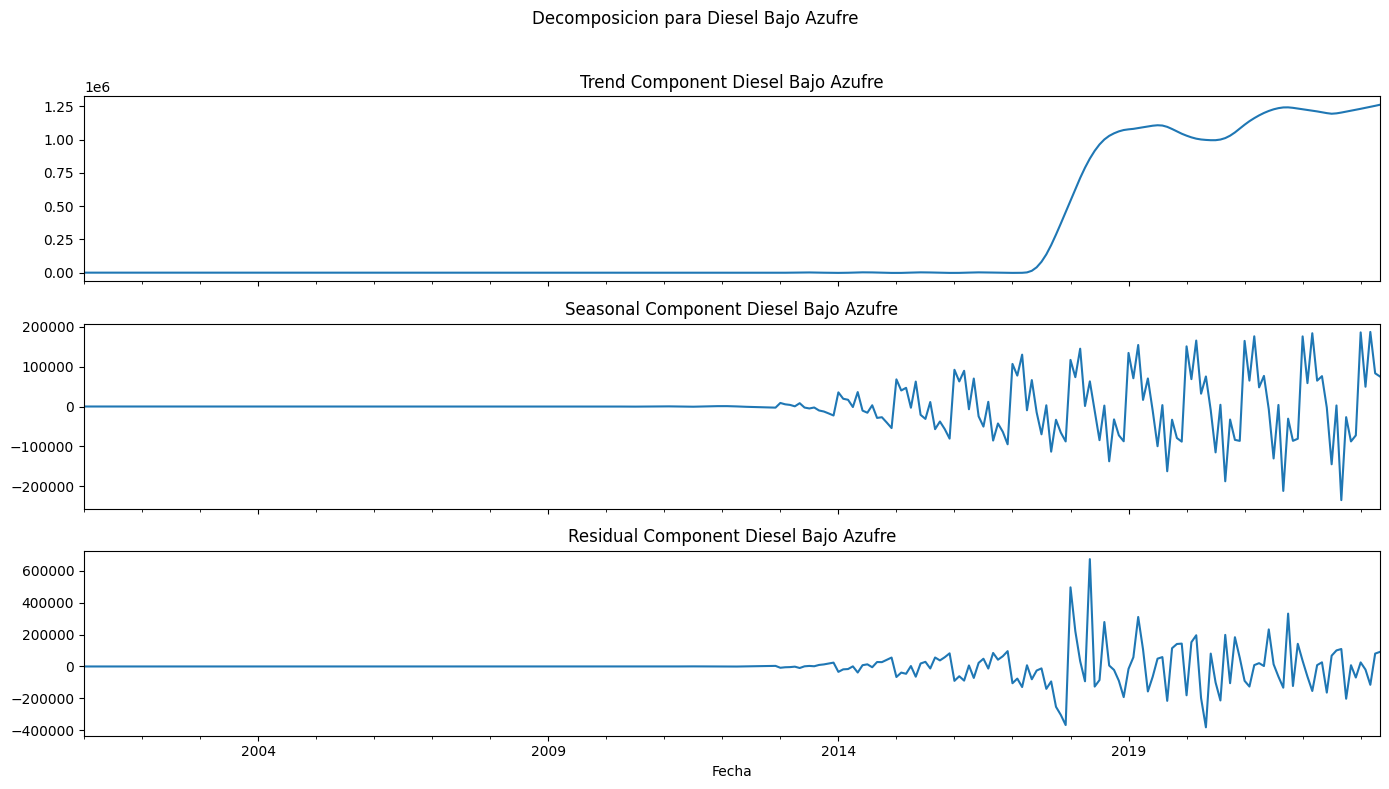

In [13]:
#Diesel bajo azufre
diesel_bajo_azufre_series = df_import.set_index('Fecha')['Diesel bajo azufre']

stl_diesel_bajo_azufre = STL(diesel_bajo_azufre_series, seasonal=13)
result_diesel_bajo_azufre = stl_diesel_bajo_azufre.fit()

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(14, 8), sharex=True)
result_diesel_bajo_azufre.trend.plot(ax=ax1, title='Trend Component Diesel Bajo Azufre')
result_diesel_bajo_azufre.seasonal.plot(ax=ax2, title='Seasonal Component Diesel Bajo Azufre')
result_diesel_bajo_azufre.resid.plot(ax=ax3, title='Residual Component Diesel Bajo Azufre')
plt.suptitle('Decomposicion para Diesel Bajo Azufre')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


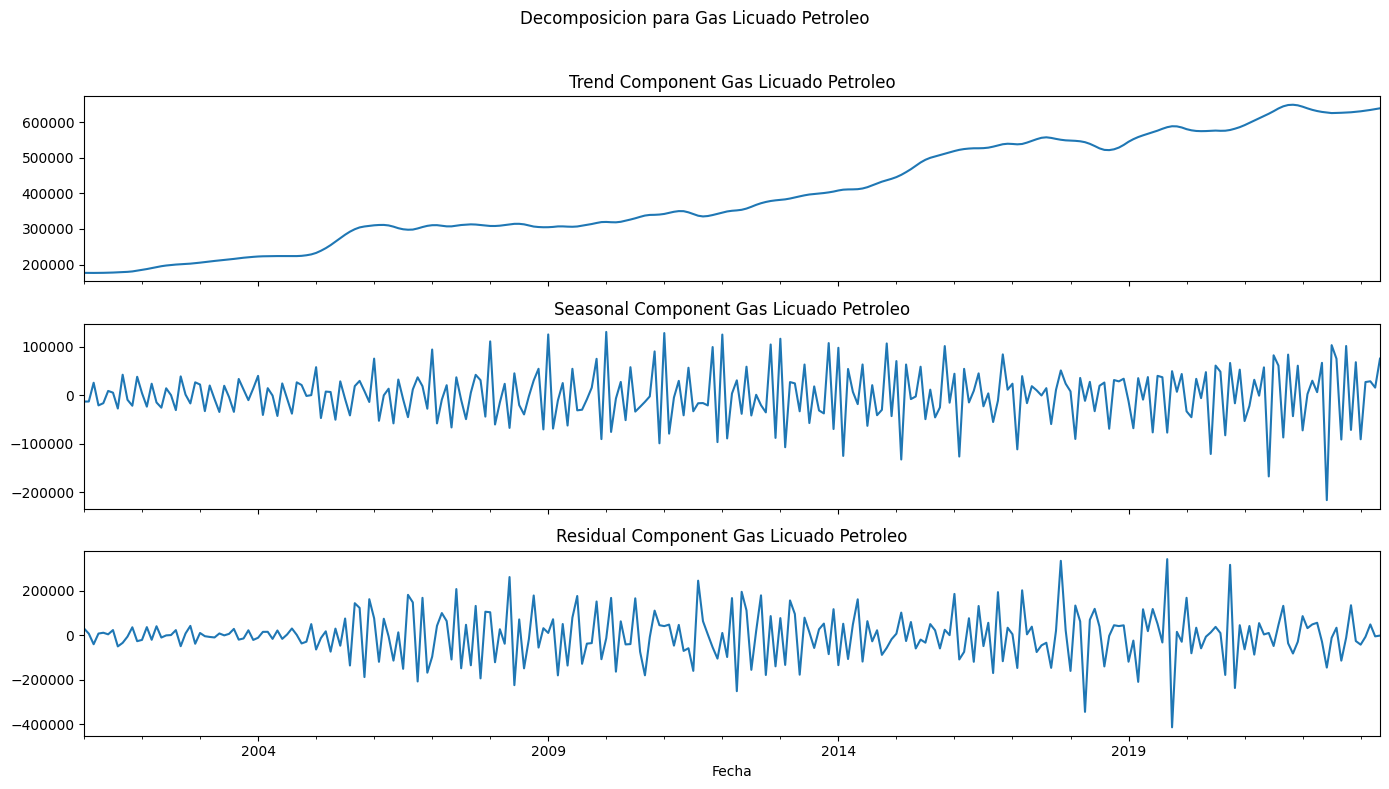

In [14]:
#Gas licuado petroleo
gas_licuado_petroleo_series = df_import.set_index('Fecha')['Gas licuado petroleo']

stl_gas_licuado_petroleo = STL(gas_licuado_petroleo_series, seasonal=13)
result_gas_licuado_petroleo = stl_gas_licuado_petroleo.fit()

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(14, 8), sharex=True)
result_gas_licuado_petroleo.trend.plot(ax=ax1, title='Trend Component Gas Licuado Petroleo')
result_gas_licuado_petroleo.seasonal.plot(ax=ax2, title='Seasonal Component Gas Licuado Petroleo')
result_gas_licuado_petroleo.resid.plot(ax=ax3, title='Residual Component Gas Licuado Petroleo')
plt.suptitle('Decomposicion para Gas Licuado Petroleo')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


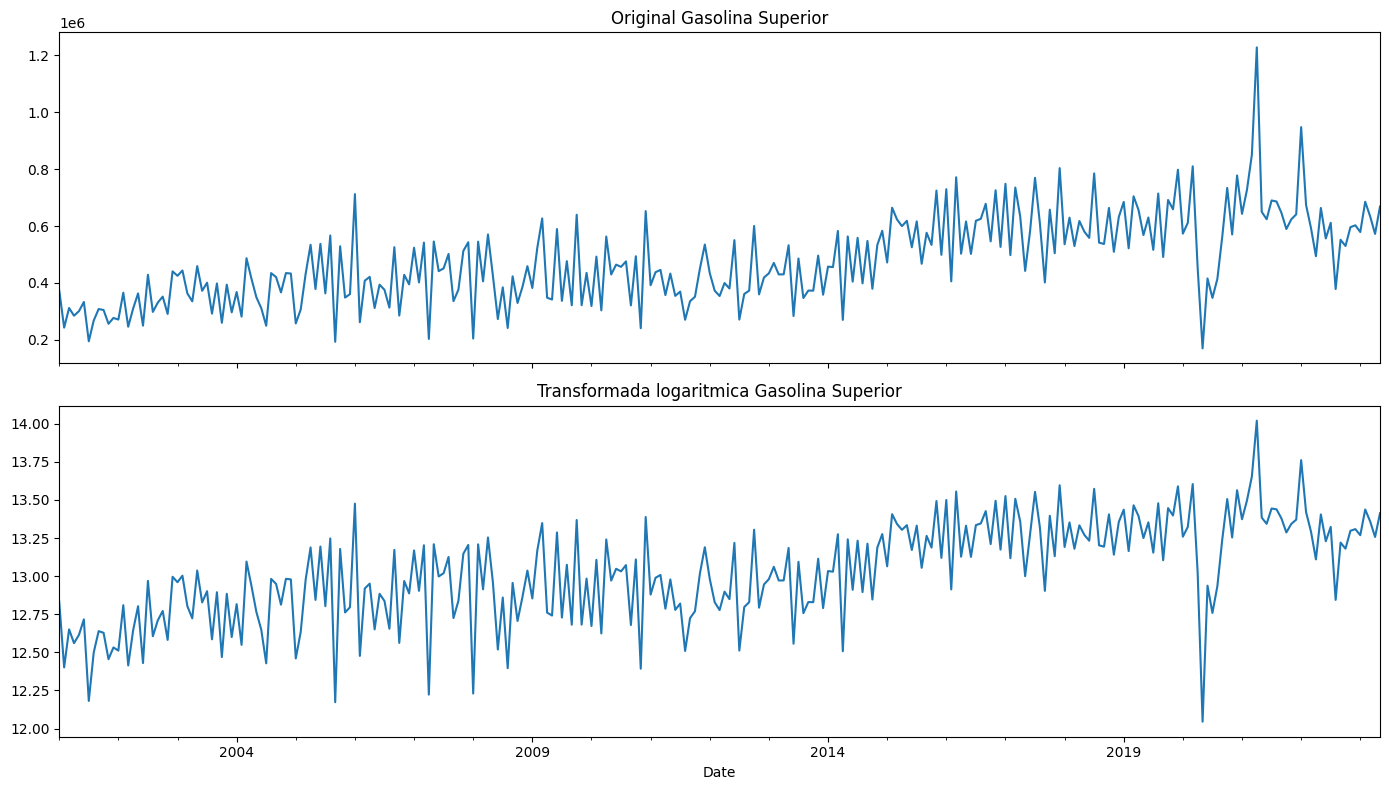

In [15]:

import numpy as np

log_gasolina_superior_series = np.log(gasolina_superior_series)

fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 8), sharex=True)
gasolina_superior_series.plot(ax=ax1, title='Original Gasolina Superior')
log_gasolina_superior_series.plot(ax=ax2, title='Transformada logaritmica Gasolina Superior')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


Como podemos observar, no se merece una transformación, ya que ambas series son bastante similares y no muestran comportamientos que varian entre ellas. Por motivos de estabilidad se puede trabajar con la transformada logaritmicamente, pero no es necesario ni obligatorio realizar ninguna transformación. 

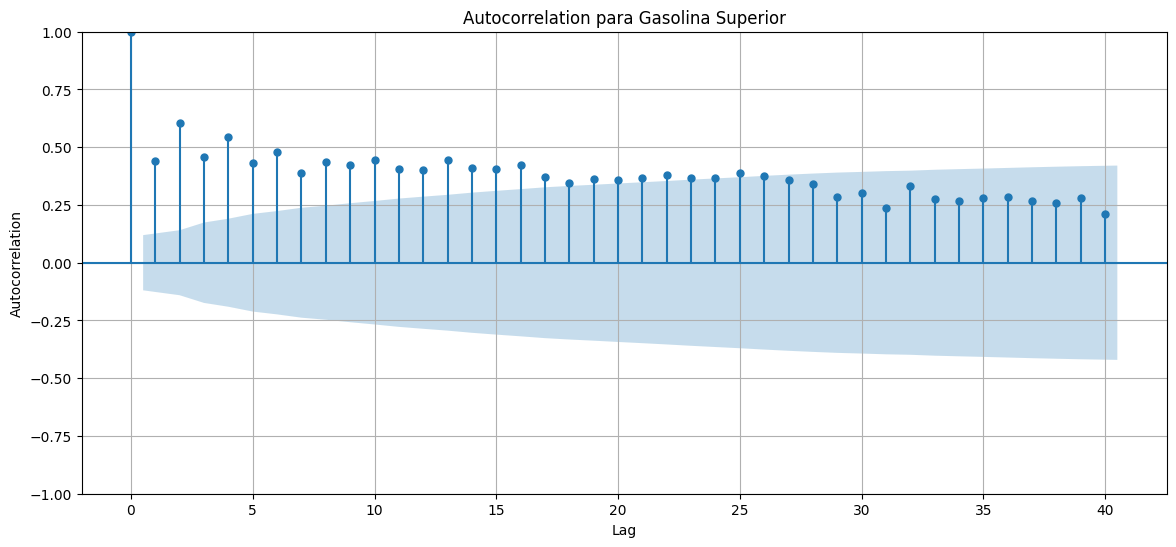

In [16]:
#E. i. grafica de autocorrelación 
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(14, 6))
plot_acf(gasolina_superior_series, ax=ax, lags=40)
plt.title('Autocorrelation para Gasolina Superior')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


In [17]:
# E. ii. Prueba Dickey-Fuller Aumentada (ADF)
from statsmodels.tsa.stattools import adfuller

# Performing the Dickey-Fuller Augmented test on the time series for "Gasolina superior"
adf_result_gasolina_superior = adfuller(gasolina_superior_series)

# Extracting the test statistic, p-value, and critical values
adf_statistic = adf_result_gasolina_superior[0]
p_value = adf_result_gasolina_superior[1]
critical_values = adf_result_gasolina_superior[4]

adf_statistic, p_value, critical_values


(-3.0284347009544144,
 0.03232293895189888,
 {'1%': -3.4552699038400827,
  '5%': -2.8725092359464526,
  '10%': -2.5726152830188678})

ii. Valores estadísticos como la prueba de Dickey-Fuller. Aumentada para corroborar la no estacionarieda en media. 

¿Qué es necesario hacer para hacerla estacionaria en media en caso de que no lo sea?

Como podemos observar, los valores de la prueba de Dickey-Fuller Aumentada son los siguientes: 
Test Statistic: -3.03
P-value: 0.0323
Valores Criticos:
1%: -3.46
5%: -2.87
10%: -2.57

Tomando esto y la grafica de autocorrelación, y sabiendo que nuestro valores criticos son menores al valor estadistico evalulado, podemos decir con bastante confianza que la serie con la que se esta trabajando no posee estacionaridad en media. En este caso nos cmbiene transfformala logaritmicamente para que se mantenga con estacionaridad en media. 

#### f.  Una vez analizada la serie, elija los parámetros p, q y d del modelo ARMA o ARIMA que utilizará para predecir. Explique en qué se basó para darle valor a estos parámetros, basándose en las funciones de autocorrelación y autocorrelación parcial. Si usa la función autoarima de R, determine y explique si tiene sentido el modelo propuesto.

#### g.  Haga varios modelos ARIMA, y diga cuál es el mejor de ellos para estimar los datos de la serie. Para esto analice los residuos y las métricas AIC y/ BIC.

#### h.  Haga un modelo usando el algoritmo prophet de Facebook o redes neuronales. Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?

### 4. Haga una predicción de los valores de la serie para los últimos 3 años. Explique qué tan buena es su predicción. En el caso de la serie de precios, use los datos de 2023 como conjunto de prueba

### 5. Haga una predicción para todo este año 2023 determine qué tan apegada es a la realidad teniendo en cuenta los meses pasados del año actual.

### 6. Discuta cuál fue el comportamiento de las series durante la pandemia. ¿Qué tanto afectó las predicciones?¿se recuperaron los valores habituales en el regreso a la “nueva normalidad”?